load all the usefull stuff

In [3]:
library(igraph)
library(gplots)
library(ggplot2)
library(circlize)

EEGNames = c('Fp1','AF7','AF3','F1','F3','F5','F7','FT7','FC5','FC3','FC1','C1',
             'C3','C5','T7','TP7','CP5','CP3','CP1','P1','P3','P5','P7','P9','PO7',
             'PO3','O1','Lz','Oz','POz','Pz','CPz','Fpz','Fp2','AF8','AF4','AFz','Fz',
             'F2','F4','F6','F8','FT8','FC6','FC4','FC2','FCz','Cz','C2','C4','C6',
             'T8','TP8','CP6','CP4','CP2','P2','P4','P6','P8','P10','PO8','PO4','O2')

bands = c("theta","alpha","beta","gamma")
lay = as.matrix(read.csv("./Tools/Biosemi64_Layout.csv",header = FALSE))

loop through files and create graphs

[1] "./Output/0001_conn.csv"


Warning message in E(g)$weight + E(g_mst)$weight:
“longer object length is not a multiple of shorter object length”

[1] "./Output/0025_conn.csv"


Warning message in E(g)$weight + E(g_mst)$weight:
“longer object length is not a multiple of shorter object length”

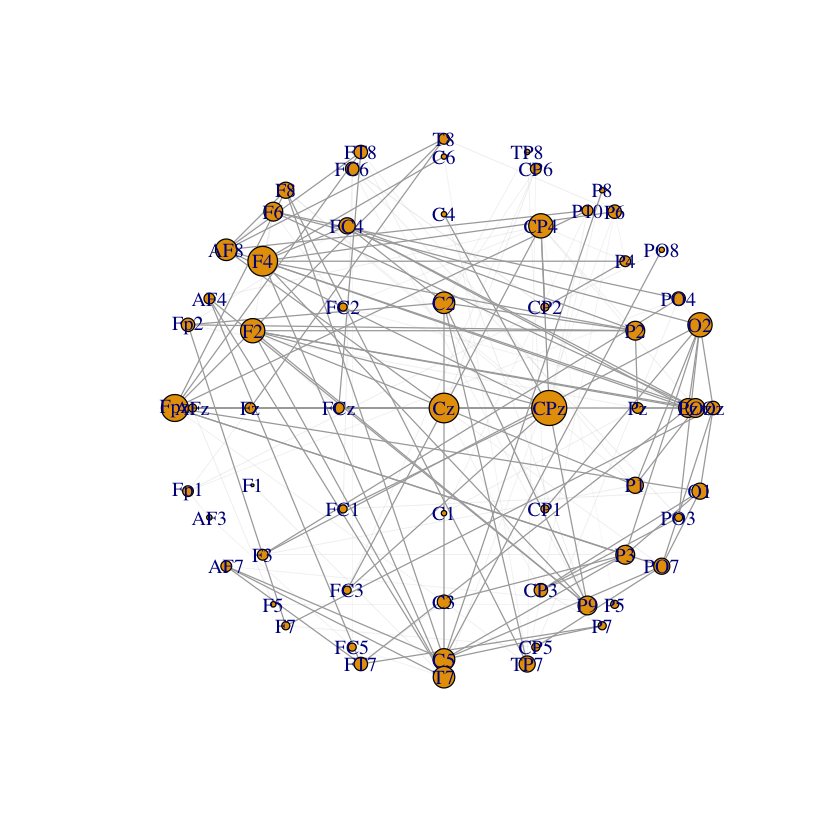

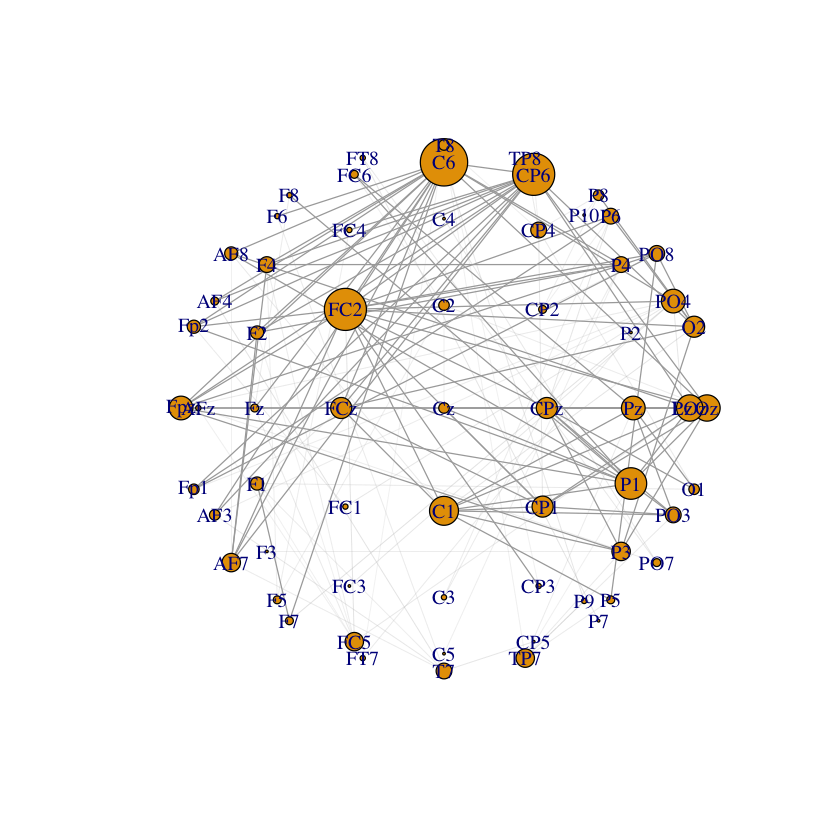

In [61]:
inputlist <- list.files("./Output/",pattern = ".csv")

for (i in inputlist) {
  j = paste("./Output/",i,sep="")
# read csv file
dat=read.csv(j,header=TRUE)

#loop over files
for (b in bands) {
  #load data
  data = subset(dat,select = c('channel_1','channel_2', b))
  #convert to matrix
  el=as.matrix(data)
  #convert to graph
  G <- graph.data.frame(el,directed=FALSE);
  #convert to weighted adjacency matrix
  A <- as_adjacency_matrix(G,type="both",names=TRUE,sparse=FALSE,attr=b)
  #set names
  rownames(A) = EEGNames
  colnames(A) = EEGNames
  #slightly annoying workaround to create a weighted graph object...
  temp = graph_from_adjacency_matrix(A, mode = "undirected", weighted = TRUE, diag = FALSE,
  add.colnames = NULL)
assign((b),temp)

}
    print(j)
    #create an example plot 
    g_mst = mst(alpha)
    weights <- sort(E(alpha)$weight, decreasing=TRUE)
    threshold <- weights[length(weights)*0.05] #threshold at 5%
    g=delete.edges(alpha, which(E(alpha)$weight <=threshold))
    # now add the mst to the thresholded one
    E(g)$weight = E(g)$weight + E(g_mst)$weight #not entirely sure if this is valid as it leaves unconnected nodes
    #or
    g_new = union(g,g_mst)
    E(g_new)$weight = (E(g_new)$weight_1) + (E(g_new)$weight_2) #but this doesn't really seem to add the edge weights...
    #rglplot(g,layout = lay, vertex.size=(strength(g)),edge.width=E(alpha)$weight) #this will plot the interactive 3d version using quartz
    plot(g_new,layout = lay, vertex.size=(strength(g_new)),edge.width=E(g_new)$weight_2)
}